## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  66.607271  1610.948421  0.859247  6.943893  1.572264
1  61.069221   363.837655  0.076938  8.216874  0.330140
2  98.667861   171.062378  0.114429  2.592176  0.182954
3  54.949279  1028.873114  0.052143  6.123781  0.831655
4  69.583714   811.107149  0.708037  5.563311  1.428298


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.02),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 0.92951 | train_mse: 7.17209 | train_mae: 1.86074 |  0:00:00s
epoch 1  | loss: 0.59695 | train_mse: 3.31812 | train_mae: 1.36833 |  0:00:00s
epoch 2  | loss: 0.67924 | train_mse: 2.33217 | train_mae: 1.1892  |  0:00:00s


epoch 3  | loss: 0.49981 | train_mse: 1.60702 | train_mae: 0.90724 |  0:00:00s
epoch 4  | loss: 0.4129  | train_mse: 1.62236 | train_mae: 0.90164 |  0:00:00s
epoch 5  | loss: 0.30032 | train_mse: 1.26495 | train_mae: 0.8373  |  0:00:00s


epoch 6  | loss: 0.26669 | train_mse: 1.07607 | train_mae: 0.76484 |  0:00:00s
epoch 7  | loss: 0.23493 | train_mse: 1.17336 | train_mae: 0.80115 |  0:00:00s
epoch 8  | loss: 0.37405 | train_mse: 1.0582  | train_mae: 0.73325 |  0:00:00s


epoch 9  | loss: 0.22795 | train_mse: 0.88845 | train_mae: 0.66901 |  0:00:01s
epoch 10 | loss: 0.23899 | train_mse: 0.76224 | train_mae: 0.64607 |  0:00:01s
epoch 11 | loss: 0.24948 | train_mse: 0.46898 | train_mae: 0.54687 |  0:00:01s


epoch 12 | loss: 0.29201 | train_mse: 0.39804 | train_mae: 0.52077 |  0:00:01s
epoch 13 | loss: 0.2188  | train_mse: 0.40989 | train_mae: 0.5213  |  0:00:01s
epoch 14 | loss: 0.15655 | train_mse: 0.53472 | train_mae: 0.57424 |  0:00:01s
epoch 15 | loss: 0.23854 | train_mse: 0.57798 | train_mae: 0.5938  |  0:00:01s


epoch 16 | loss: 0.2701  | train_mse: 0.37643 | train_mae: 0.47339 |  0:00:01s
epoch 17 | loss: 0.15174 | train_mse: 0.24839 | train_mae: 0.37665 |  0:00:01s
epoch 18 | loss: 0.14819 | train_mse: 0.17321 | train_mae: 0.31417 |  0:00:01s


epoch 19 | loss: 0.17723 | train_mse: 0.17677 | train_mae: 0.30903 |  0:00:01s
epoch 20 | loss: 0.13713 | train_mse: 0.22874 | train_mae: 0.35436 |  0:00:01s
epoch 21 | loss: 0.13432 | train_mse: 0.28714 | train_mae: 0.3864  |  0:00:01s
epoch 22 | loss: 0.13509 | train_mse: 0.24407 | train_mae: 0.35147 |  0:00:01s


epoch 23 | loss: 0.16056 | train_mse: 0.20428 | train_mae: 0.33173 |  0:00:01s
epoch 24 | loss: 0.26391 | train_mse: 0.20847 | train_mae: 0.33788 |  0:00:02s
epoch 25 | loss: 0.13231 | train_mse: 0.23993 | train_mae: 0.36423 |  0:00:02s


epoch 26 | loss: 0.13955 | train_mse: 0.23864 | train_mae: 0.35957 |  0:00:02s
epoch 27 | loss: 0.10633 | train_mse: 0.16918 | train_mae: 0.31519 |  0:00:02s
epoch 28 | loss: 0.20864 | train_mse: 0.14989 | train_mae: 0.28845 |  0:00:02s
epoch 29 | loss: 0.27981 | train_mse: 0.11933 | train_mae: 0.26261 |  0:00:02s


epoch 30 | loss: 0.16039 | train_mse: 0.11367 | train_mae: 0.25907 |  0:00:02s
epoch 31 | loss: 0.17472 | train_mse: 0.11065 | train_mae: 0.25207 |  0:00:02s
epoch 32 | loss: 0.11061 | train_mse: 0.08528 | train_mae: 0.22999 |  0:00:02s


epoch 33 | loss: 0.17866 | train_mse: 0.08017 | train_mae: 0.22535 |  0:00:02s
epoch 34 | loss: 0.18518 | train_mse: 0.09435 | train_mae: 0.23956 |  0:00:02s
epoch 35 | loss: 0.14701 | train_mse: 0.11059 | train_mae: 0.26427 |  0:00:02s


epoch 36 | loss: 0.13987 | train_mse: 0.10899 | train_mae: 0.25766 |  0:00:02s
epoch 37 | loss: 0.10881 | train_mse: 0.17417 | train_mae: 0.27964 |  0:00:02s
epoch 38 | loss: 0.165   | train_mse: 0.16055 | train_mae: 0.26176 |  0:00:03s
epoch 39 | loss: 0.11479 | train_mse: 0.12272 | train_mae: 0.24555 |  0:00:03s


epoch 40 | loss: 0.2067  | train_mse: 0.10392 | train_mae: 0.23601 |  0:00:03s
epoch 41 | loss: 0.16681 | train_mse: 0.09719 | train_mae: 0.22935 |  0:00:03s
epoch 42 | loss: 0.24152 | train_mse: 0.10703 | train_mae: 0.24262 |  0:00:03s
epoch 43 | loss: 0.13963 | train_mse: 0.11525 | train_mae: 0.25319 |  0:00:03s


epoch 44 | loss: 0.16936 | train_mse: 0.1149  | train_mae: 0.24995 |  0:00:03s
epoch 45 | loss: 0.16499 | train_mse: 0.11548 | train_mae: 0.25088 |  0:00:03s
epoch 46 | loss: 0.13136 | train_mse: 0.09352 | train_mae: 0.23373 |  0:00:03s


epoch 47 | loss: 0.08246 | train_mse: 0.07643 | train_mae: 0.22252 |  0:00:03s
epoch 48 | loss: 0.13276 | train_mse: 0.08175 | train_mae: 0.2191  |  0:00:03s
epoch 49 | loss: 0.14277 | train_mse: 0.10347 | train_mae: 0.24443 |  0:00:03s


epoch 50 | loss: 0.14775 | train_mse: 0.14174 | train_mae: 0.28375 |  0:00:03s
epoch 51 | loss: 0.13086 | train_mse: 0.18678 | train_mae: 0.3237  |  0:00:03s
epoch 52 | loss: 0.12714 | train_mse: 0.11147 | train_mae: 0.25641 |  0:00:03s


epoch 53 | loss: 0.11355 | train_mse: 0.07071 | train_mae: 0.19886 |  0:00:04s
epoch 54 | loss: 0.09738 | train_mse: 0.06488 | train_mae: 0.19477 |  0:00:04s
epoch 55 | loss: 0.1292  | train_mse: 0.1015  | train_mae: 0.23282 |  0:00:04s
epoch 56 | loss: 0.24462 | train_mse: 0.11645 | train_mae: 0.25927 |  0:00:04s
epoch 57 | loss: 0.1114  | train_mse: 0.0941  | train_mae: 0.23985 |  0:00:04s


epoch 58 | loss: 0.24826 | train_mse: 0.09045 | train_mae: 0.2281  |  0:00:04s
epoch 59 | loss: 0.35039 | train_mse: 0.09566 | train_mae: 0.23137 |  0:00:04s
epoch 60 | loss: 0.1153  | train_mse: 0.08831 | train_mae: 0.22549 |  0:00:04s
epoch 61 | loss: 0.1     | train_mse: 0.07512 | train_mae: 0.21284 |  0:00:04s


epoch 62 | loss: 0.10238 | train_mse: 0.07654 | train_mae: 0.2188  |  0:00:04s
epoch 63 | loss: 0.13427 | train_mse: 0.09013 | train_mae: 0.22896 |  0:00:04s
epoch 64 | loss: 0.08959 | train_mse: 0.10642 | train_mae: 0.24014 |  0:00:04s
epoch 65 | loss: 0.13649 | train_mse: 0.12786 | train_mae: 0.24144 |  0:00:04s


epoch 66 | loss: 0.06685 | train_mse: 0.19981 | train_mae: 0.28069 |  0:00:04s
epoch 67 | loss: 0.08632 | train_mse: 0.2363  | train_mae: 0.29385 |  0:00:04s
epoch 68 | loss: 0.14716 | train_mse: 0.24205 | train_mae: 0.29533 |  0:00:05s


epoch 69 | loss: 0.0826  | train_mse: 0.13184 | train_mae: 0.23919 |  0:00:05s
epoch 70 | loss: 0.19947 | train_mse: 0.06166 | train_mae: 0.19123 |  0:00:05s
epoch 71 | loss: 0.17776 | train_mse: 0.05729 | train_mae: 0.18958 |  0:00:05s


epoch 72 | loss: 0.10511 | train_mse: 0.07328 | train_mae: 0.20249 |  0:00:05s
epoch 73 | loss: 0.09304 | train_mse: 0.08183 | train_mae: 0.20827 |  0:00:05s
epoch 74 | loss: 0.08814 | train_mse: 0.08126 | train_mae: 0.20504 |  0:00:05s
epoch 75 | loss: 0.10376 | train_mse: 0.08244 | train_mae: 0.20487 |  0:00:05s


epoch 76 | loss: 0.08093 | train_mse: 0.07517 | train_mae: 0.19665 |  0:00:05s
epoch 77 | loss: 0.0923  | train_mse: 0.08275 | train_mae: 0.20826 |  0:00:05s
epoch 78 | loss: 0.17518 | train_mse: 0.08798 | train_mae: 0.22784 |  0:00:05s
epoch 79 | loss: 0.43765 | train_mse: 0.12163 | train_mae: 0.25567 |  0:00:05s


epoch 80 | loss: 0.16808 | train_mse: 0.07321 | train_mae: 0.19677 |  0:00:05s
epoch 81 | loss: 0.12761 | train_mse: 0.10246 | train_mae: 0.22182 |  0:00:05s
epoch 82 | loss: 0.14672 | train_mse: 0.1314  | train_mae: 0.27285 |  0:00:05s


epoch 83 | loss: 0.13511 | train_mse: 0.09269 | train_mae: 0.21322 |  0:00:06s
epoch 84 | loss: 0.07912 | train_mse: 0.07499 | train_mae: 0.20272 |  0:00:06s
epoch 85 | loss: 0.11075 | train_mse: 0.05982 | train_mae: 0.18838 |  0:00:06s
epoch 86 | loss: 0.09704 | train_mse: 0.06126 | train_mae: 0.18824 |  0:00:06s


epoch 87 | loss: 0.11469 | train_mse: 0.06296 | train_mae: 0.18582 |  0:00:06s
epoch 88 | loss: 0.07025 | train_mse: 0.0617  | train_mae: 0.18879 |  0:00:06s
epoch 89 | loss: 0.15163 | train_mse: 0.06508 | train_mae: 0.19605 |  0:00:06s
epoch 90 | loss: 0.11708 | train_mse: 0.13423 | train_mae: 0.24184 |  0:00:06s


epoch 91 | loss: 0.09594 | train_mse: 0.17746 | train_mae: 0.25523 |  0:00:06s
epoch 92 | loss: 0.09402 | train_mse: 0.117   | train_mae: 0.23379 |  0:00:06s
epoch 93 | loss: 0.0766  | train_mse: 0.12364 | train_mae: 0.25209 |  0:00:06s
epoch 94 | loss: 0.07788 | train_mse: 0.12552 | train_mae: 0.26282 |  0:00:06s


epoch 95 | loss: 0.14747 | train_mse: 0.11608 | train_mae: 0.24259 |  0:00:06s
epoch 96 | loss: 0.14957 | train_mse: 0.07251 | train_mae: 0.2048  |  0:00:06s
epoch 97 | loss: 0.08515 | train_mse: 0.07105 | train_mae: 0.20338 |  0:00:06s


epoch 98 | loss: 0.23654 | train_mse: 0.06196 | train_mae: 0.1919  |  0:00:07s
epoch 99 | loss: 0.11862 | train_mse: 0.06233 | train_mae: 0.1891  |  0:00:07s
epoch 100| loss: 0.11661 | train_mse: 0.07546 | train_mae: 0.20431 |  0:00:07s


epoch 101| loss: 0.1572  | train_mse: 0.09071 | train_mae: 0.2123  |  0:00:07s
epoch 102| loss: 0.0898  | train_mse: 0.07834 | train_mae: 0.20253 |  0:00:07s
epoch 103| loss: 0.11115 | train_mse: 0.06922 | train_mae: 0.20327 |  0:00:07s


epoch 104| loss: 0.11337 | train_mse: 0.08879 | train_mae: 0.2342  |  0:00:07s
epoch 105| loss: 0.09521 | train_mse: 0.10193 | train_mae: 0.24634 |  0:00:07s
epoch 106| loss: 0.07282 | train_mse: 0.11071 | train_mae: 0.23253 |  0:00:07s
epoch 107| loss: 0.09025 | train_mse: 0.11223 | train_mae: 0.22653 |  0:00:07s


epoch 108| loss: 0.07007 | train_mse: 0.12026 | train_mae: 0.23719 |  0:00:07s
epoch 109| loss: 0.17311 | train_mse: 0.10967 | train_mae: 0.24607 |  0:00:07s
epoch 110| loss: 0.094   | train_mse: 0.13833 | train_mae: 0.27014 |  0:00:07s
epoch 111| loss: 0.06445 | train_mse: 0.11224 | train_mae: 0.23692 |  0:00:07s


epoch 112| loss: 0.10195 | train_mse: 0.09427 | train_mae: 0.21657 |  0:00:08s
epoch 113| loss: 0.11206 | train_mse: 0.0999  | train_mae: 0.22142 |  0:00:08s
epoch 114| loss: 0.12318 | train_mse: 0.1273  | train_mae: 0.24808 |  0:00:08s


epoch 115| loss: 0.06367 | train_mse: 0.14186 | train_mae: 0.26068 |  0:00:08s
epoch 116| loss: 0.05664 | train_mse: 0.12019 | train_mae: 0.24213 |  0:00:08s
epoch 117| loss: 0.08032 | train_mse: 0.0852  | train_mae: 0.20408 |  0:00:08s
epoch 118| loss: 0.07697 | train_mse: 0.06894 | train_mae: 0.19684 |  0:00:08s
epoch 119| loss: 0.06976 | train_mse: 0.07607 | train_mae: 0.21098 |  0:00:08s


epoch 120| loss: 0.10408 | train_mse: 0.09625 | train_mae: 0.22679 |  0:00:08s
epoch 121| loss: 0.10496 | train_mse: 0.08738 | train_mae: 0.21261 |  0:00:08s
epoch 122| loss: 0.08045 | train_mse: 0.07267 | train_mae: 0.19373 |  0:00:08s
epoch 123| loss: 0.08446 | train_mse: 0.05025 | train_mae: 0.17598 |  0:00:08s


epoch 124| loss: 0.12229 | train_mse: 0.04704 | train_mae: 0.17293 |  0:00:08s
epoch 125| loss: 0.05988 | train_mse: 0.05021 | train_mae: 0.17495 |  0:00:08s
epoch 126| loss: 0.09432 | train_mse: 0.04441 | train_mae: 0.16371 |  0:00:08s


epoch 127| loss: 0.17077 | train_mse: 0.05044 | train_mae: 0.16952 |  0:00:09s
epoch 128| loss: 0.12589 | train_mse: 0.04082 | train_mae: 0.16153 |  0:00:09s
epoch 129| loss: 0.08831 | train_mse: 0.03864 | train_mae: 0.16038 |  0:00:09s


epoch 130| loss: 0.14518 | train_mse: 0.0351  | train_mae: 0.15627 |  0:00:09s
epoch 131| loss: 0.06912 | train_mse: 0.03695 | train_mae: 0.15639 |  0:00:09s
epoch 132| loss: 0.06586 | train_mse: 0.04735 | train_mae: 0.16955 |  0:00:09s
epoch 133| loss: 0.09425 | train_mse: 0.06209 | train_mae: 0.18917 |  0:00:09s


epoch 134| loss: 0.0638  | train_mse: 0.07843 | train_mae: 0.20517 |  0:00:09s
epoch 135| loss: 0.11798 | train_mse: 0.06726 | train_mae: 0.19435 |  0:00:09s
epoch 136| loss: 0.07786 | train_mse: 0.04947 | train_mae: 0.17608 |  0:00:09s
epoch 137| loss: 0.07358 | train_mse: 0.04634 | train_mae: 0.1737  |  0:00:09s


epoch 138| loss: 0.06646 | train_mse: 0.0647  | train_mae: 0.19282 |  0:00:09s
epoch 139| loss: 0.08208 | train_mse: 0.08374 | train_mae: 0.22387 |  0:00:09s
epoch 140| loss: 0.20795 | train_mse: 0.09168 | train_mae: 0.23706 |  0:00:09s
epoch 141| loss: 0.07096 | train_mse: 0.07952 | train_mae: 0.2146  |  0:00:09s


epoch 142| loss: 0.09312 | train_mse: 0.0681  | train_mae: 0.20097 |  0:00:10s
epoch 143| loss: 0.07996 | train_mse: 0.05694 | train_mae: 0.18716 |  0:00:10s
epoch 144| loss: 0.14706 | train_mse: 0.06172 | train_mae: 0.1963  |  0:00:10s


epoch 145| loss: 0.11049 | train_mse: 0.06582 | train_mae: 0.1971  |  0:00:10s
epoch 146| loss: 0.08655 | train_mse: 0.06332 | train_mae: 0.18304 |  0:00:10s
epoch 147| loss: 0.10158 | train_mse: 0.04679 | train_mae: 0.1676  |  0:00:10s
epoch 148| loss: 0.06348 | train_mse: 0.04066 | train_mae: 0.16337 |  0:00:10s


epoch 149| loss: 0.0634  | train_mse: 0.03859 | train_mae: 0.15553 |  0:00:10s
epoch 150| loss: 0.08006 | train_mse: 0.04427 | train_mae: 0.17134 |  0:00:10s
epoch 151| loss: 0.07824 | train_mse: 0.04163 | train_mae: 0.16807 |  0:00:10s
epoch 152| loss: 0.09126 | train_mse: 0.04714 | train_mae: 0.16742 |  0:00:10s


epoch 153| loss: 0.09153 | train_mse: 0.0595  | train_mae: 0.17418 |  0:00:10s
epoch 154| loss: 0.05781 | train_mse: 0.05334 | train_mae: 0.17145 |  0:00:10s
epoch 155| loss: 0.05122 | train_mse: 0.05256 | train_mae: 0.17566 |  0:00:10s
epoch 156| loss: 0.07759 | train_mse: 0.05581 | train_mae: 0.17376 |  0:00:10s


epoch 157| loss: 0.09605 | train_mse: 0.04913 | train_mae: 0.17077 |  0:00:11s
epoch 158| loss: 0.05618 | train_mse: 0.04977 | train_mae: 0.17075 |  0:00:11s
epoch 159| loss: 0.09051 | train_mse: 0.05068 | train_mae: 0.17027 |  0:00:11s
epoch 160| loss: 0.11369 | train_mse: 0.05477 | train_mae: 0.17159 |  0:00:11s


epoch 161| loss: 0.08216 | train_mse: 0.09024 | train_mae: 0.20496 |  0:00:11s
epoch 162| loss: 0.0701  | train_mse: 0.11029 | train_mae: 0.21744 |  0:00:11s
epoch 163| loss: 0.20641 | train_mse: 0.15524 | train_mae: 0.25212 |  0:00:11s
epoch 164| loss: 0.07757 | train_mse: 0.08001 | train_mae: 0.20951 |  0:00:11s


epoch 165| loss: 0.08851 | train_mse: 0.04916 | train_mae: 0.17084 |  0:00:11s
epoch 166| loss: 0.15002 | train_mse: 0.03796 | train_mae: 0.15596 |  0:00:11s
epoch 167| loss: 0.10277 | train_mse: 0.04468 | train_mae: 0.16533 |  0:00:11s
epoch 168| loss: 0.05629 | train_mse: 0.05499 | train_mae: 0.17332 |  0:00:11s


epoch 169| loss: 0.08987 | train_mse: 0.07511 | train_mae: 0.18946 |  0:00:11s
epoch 170| loss: 0.14231 | train_mse: 0.09347 | train_mae: 0.20726 |  0:00:11s
epoch 171| loss: 0.08587 | train_mse: 0.08944 | train_mae: 0.2016  |  0:00:11s


epoch 172| loss: 0.07422 | train_mse: 0.10866 | train_mae: 0.23438 |  0:00:12s
epoch 173| loss: 0.10991 | train_mse: 0.09787 | train_mae: 0.22734 |  0:00:12s
epoch 174| loss: 0.12261 | train_mse: 0.05797 | train_mae: 0.18356 |  0:00:12s
epoch 175| loss: 0.09338 | train_mse: 0.07604 | train_mae: 0.19094 |  0:00:12s


epoch 176| loss: 0.08956 | train_mse: 0.06866 | train_mae: 0.19102 |  0:00:12s
epoch 177| loss: 0.14537 | train_mse: 0.05516 | train_mae: 0.18739 |  0:00:12s
epoch 178| loss: 0.2272  | train_mse: 0.04058 | train_mae: 0.16467 |  0:00:12s
epoch 179| loss: 0.05852 | train_mse: 0.04136 | train_mae: 0.16496 |  0:00:12s


epoch 180| loss: 0.0755  | train_mse: 0.04712 | train_mae: 0.16676 |  0:00:12s
epoch 181| loss: 0.11839 | train_mse: 0.05468 | train_mae: 0.1694  |  0:00:12s
epoch 182| loss: 0.05607 | train_mse: 0.04887 | train_mae: 0.16447 |  0:00:12s
epoch 183| loss: 0.11757 | train_mse: 0.05459 | train_mae: 0.17982 |  0:00:12s


epoch 184| loss: 0.12363 | train_mse: 0.06298 | train_mae: 0.19179 |  0:00:12s
epoch 185| loss: 0.16754 | train_mse: 0.0482  | train_mae: 0.17279 |  0:00:12s
epoch 186| loss: 0.07437 | train_mse: 0.0525  | train_mae: 0.18211 |  0:00:12s
epoch 187| loss: 0.0801  | train_mse: 0.0509  | train_mae: 0.17345 |  0:00:13s


epoch 188| loss: 0.05397 | train_mse: 0.05516 | train_mae: 0.1691  |  0:00:13s
epoch 189| loss: 0.11777 | train_mse: 0.05352 | train_mae: 0.16536 |  0:00:13s
epoch 190| loss: 0.05703 | train_mse: 0.04182 | train_mae: 0.16465 |  0:00:13s
epoch 191| loss: 0.1221  | train_mse: 0.05619 | train_mae: 0.18269 |  0:00:13s


epoch 192| loss: 0.13359 | train_mse: 0.07843 | train_mae: 0.19467 |  0:00:13s
epoch 193| loss: 0.09412 | train_mse: 0.06797 | train_mae: 0.18881 |  0:00:13s
epoch 194| loss: 0.0626  | train_mse: 0.0503  | train_mae: 0.1685  |  0:00:13s
epoch 195| loss: 0.08064 | train_mse: 0.04302 | train_mae: 0.15187 |  0:00:13s


epoch 196| loss: 0.05955 | train_mse: 0.07139 | train_mae: 0.18428 |  0:00:13s
epoch 197| loss: 0.07522 | train_mse: 0.09218 | train_mae: 0.20838 |  0:00:13s
epoch 198| loss: 0.10138 | train_mse: 0.07964 | train_mae: 0.19805 |  0:00:13s
epoch 199| loss: 0.1296  | train_mse: 0.0803  | train_mae: 0.19411 |  0:00:13s


epoch 200| loss: 0.05436 | train_mse: 0.06789 | train_mae: 0.17835 |  0:00:13s
epoch 201| loss: 0.07396 | train_mse: 0.07498 | train_mae: 0.18244 |  0:00:13s
epoch 202| loss: 0.10805 | train_mse: 0.07489 | train_mae: 0.18043 |  0:00:13s


epoch 203| loss: 0.08177 | train_mse: 0.07605 | train_mae: 0.203   |  0:00:14s
epoch 204| loss: 0.06542 | train_mse: 0.06024 | train_mae: 0.19371 |  0:00:14s
epoch 205| loss: 0.05615 | train_mse: 0.04281 | train_mae: 0.15756 |  0:00:14s
epoch 206| loss: 0.08738 | train_mse: 0.03826 | train_mae: 0.15345 |  0:00:14s


epoch 207| loss: 0.09379 | train_mse: 0.03174 | train_mae: 0.13983 |  0:00:14s
epoch 208| loss: 0.04478 | train_mse: 0.03771 | train_mae: 0.14442 |  0:00:14s
epoch 209| loss: 0.0915  | train_mse: 0.0454  | train_mae: 0.16336 |  0:00:14s
epoch 210| loss: 0.06434 | train_mse: 0.03698 | train_mae: 0.15313 |  0:00:14s


epoch 211| loss: 0.07316 | train_mse: 0.03309 | train_mae: 0.14384 |  0:00:14s
epoch 212| loss: 0.15386 | train_mse: 0.04639 | train_mae: 0.15652 |  0:00:14s
epoch 213| loss: 0.05569 | train_mse: 0.04928 | train_mae: 0.15252 |  0:00:14s
epoch 214| loss: 0.07593 | train_mse: 0.04636 | train_mae: 0.15711 |  0:00:14s


epoch 215| loss: 0.05799 | train_mse: 0.03893 | train_mae: 0.14997 |  0:00:14s
epoch 216| loss: 0.06828 | train_mse: 0.03376 | train_mae: 0.14303 |  0:00:14s
epoch 217| loss: 0.05908 | train_mse: 0.02801 | train_mae: 0.12943 |  0:00:14s


epoch 218| loss: 0.06236 | train_mse: 0.02607 | train_mae: 0.12815 |  0:00:15s
epoch 219| loss: 0.05494 | train_mse: 0.04092 | train_mae: 0.14484 |  0:00:15s
epoch 220| loss: 0.0823  | train_mse: 0.04763 | train_mae: 0.15549 |  0:00:15s
epoch 221| loss: 0.08224 | train_mse: 0.05475 | train_mae: 0.17169 |  0:00:15s


epoch 222| loss: 0.05478 | train_mse: 0.04215 | train_mae: 0.16348 |  0:00:15s
epoch 223| loss: 0.08496 | train_mse: 0.03606 | train_mae: 0.15389 |  0:00:15s
epoch 224| loss: 0.07481 | train_mse: 0.03623 | train_mae: 0.15457 |  0:00:15s
epoch 225| loss: 0.0881  | train_mse: 0.03662 | train_mae: 0.15128 |  0:00:15s


epoch 226| loss: 0.08514 | train_mse: 0.03898 | train_mae: 0.14778 |  0:00:15s
epoch 227| loss: 0.15002 | train_mse: 0.03823 | train_mae: 0.14165 |  0:00:15s
epoch 228| loss: 0.05208 | train_mse: 0.07048 | train_mae: 0.17825 |  0:00:15s
epoch 229| loss: 0.08804 | train_mse: 0.0878  | train_mae: 0.19295 |  0:00:15s


epoch 230| loss: 0.04301 | train_mse: 0.11322 | train_mae: 0.20806 |  0:00:15s
epoch 231| loss: 0.06768 | train_mse: 0.12174 | train_mae: 0.20937 |  0:00:15s
epoch 232| loss: 0.04908 | train_mse: 0.14194 | train_mae: 0.22232 |  0:00:15s


epoch 233| loss: 0.06144 | train_mse: 0.10925 | train_mae: 0.20979 |  0:00:16s
epoch 234| loss: 0.04882 | train_mse: 0.07335 | train_mae: 0.19114 |  0:00:16s
epoch 235| loss: 0.05658 | train_mse: 0.06745 | train_mae: 0.1871  |  0:00:16s
epoch 236| loss: 0.05842 | train_mse: 0.06442 | train_mae: 0.17878 |  0:00:16s
epoch 237| loss: 0.09689 | train_mse: 0.0709  | train_mae: 0.18784 |  0:00:16s


epoch 238| loss: 0.10651 | train_mse: 0.05432 | train_mae: 0.17472 |  0:00:16s
epoch 239| loss: 0.06141 | train_mse: 0.03599 | train_mae: 0.1477  |  0:00:16s
epoch 240| loss: 0.06484 | train_mse: 0.03723 | train_mae: 0.14744 |  0:00:16s
epoch 241| loss: 0.05899 | train_mse: 0.0322  | train_mae: 0.13929 |  0:00:16s


epoch 242| loss: 0.07135 | train_mse: 0.03011 | train_mae: 0.13362 |  0:00:16s
epoch 243| loss: 0.04717 | train_mse: 0.0291  | train_mae: 0.13529 |  0:00:16s
epoch 244| loss: 0.06234 | train_mse: 0.03    | train_mae: 0.14099 |  0:00:16s
epoch 245| loss: 0.03485 | train_mse: 0.02465 | train_mae: 0.12354 |  0:00:16s


epoch 246| loss: 0.06565 | train_mse: 0.02517 | train_mae: 0.12355 |  0:00:16s
epoch 247| loss: 0.12904 | train_mse: 0.03686 | train_mae: 0.14596 |  0:00:16s
epoch 248| loss: 0.06815 | train_mse: 0.06489 | train_mae: 0.18378 |  0:00:17s


epoch 249| loss: 0.04043 | train_mse: 0.06587 | train_mae: 0.17959 |  0:00:17s
epoch 250| loss: 0.05959 | train_mse: 0.06065 | train_mae: 0.1676  |  0:00:17s
epoch 251| loss: 0.08876 | train_mse: 0.04822 | train_mae: 0.16198 |  0:00:17s
epoch 252| loss: 0.06955 | train_mse: 0.05398 | train_mae: 0.16679 |  0:00:17s
epoch 253| loss: 0.04615 | train_mse: 0.08892 | train_mae: 0.1938  |  0:00:17s


epoch 254| loss: 0.08948 | train_mse: 0.08327 | train_mae: 0.18828 |  0:00:17s
epoch 255| loss: 0.08441 | train_mse: 0.04632 | train_mae: 0.15596 |  0:00:17s
epoch 256| loss: 0.06503 | train_mse: 0.03328 | train_mae: 0.13266 |  0:00:17s
epoch 257| loss: 0.05543 | train_mse: 0.02748 | train_mae: 0.12245 |  0:00:17s


epoch 258| loss: 0.2065  | train_mse: 0.02806 | train_mae: 0.12794 |  0:00:17s
epoch 259| loss: 0.0597  | train_mse: 0.05117 | train_mae: 0.15993 |  0:00:17s
epoch 260| loss: 0.089   | train_mse: 0.04903 | train_mae: 0.15598 |  0:00:17s
epoch 261| loss: 0.03944 | train_mse: 0.04621 | train_mae: 0.15254 |  0:00:17s


epoch 262| loss: 0.05073 | train_mse: 0.03253 | train_mae: 0.12843 |  0:00:17s
epoch 263| loss: 0.1123  | train_mse: 0.03145 | train_mae: 0.13268 |  0:00:18s
epoch 264| loss: 0.05613 | train_mse: 0.04397 | train_mae: 0.14973 |  0:00:18s
epoch 265| loss: 0.09641 | train_mse: 0.05954 | train_mae: 0.16505 |  0:00:18s


epoch 266| loss: 0.12933 | train_mse: 0.06732 | train_mae: 0.15817 |  0:00:18s
epoch 267| loss: 0.1507  | train_mse: 0.07477 | train_mae: 0.17061 |  0:00:18s
epoch 268| loss: 0.11946 | train_mse: 0.06429 | train_mae: 0.18538 |  0:00:18s
epoch 269| loss: 0.08968 | train_mse: 0.04406 | train_mae: 0.16547 |  0:00:18s


epoch 270| loss: 0.09858 | train_mse: 0.04174 | train_mae: 0.1528  |  0:00:18s
epoch 271| loss: 0.18193 | train_mse: 0.07881 | train_mae: 0.20546 |  0:00:18s
epoch 272| loss: 0.23646 | train_mse: 0.10442 | train_mae: 0.22629 |  0:00:18s
epoch 273| loss: 0.20036 | train_mse: 0.1211  | train_mae: 0.23327 |  0:00:18s


epoch 274| loss: 0.0908  | train_mse: 0.11031 | train_mae: 0.22346 |  0:00:18s
epoch 275| loss: 0.12993 | train_mse: 0.16217 | train_mae: 0.26311 |  0:00:18s
epoch 276| loss: 0.06346 | train_mse: 0.13293 | train_mae: 0.23791 |  0:00:18s
epoch 277| loss: 0.10607 | train_mse: 0.08314 | train_mae: 0.19889 |  0:00:18s


epoch 278| loss: 0.0618  | train_mse: 0.06327 | train_mae: 0.17895 |  0:00:18s
epoch 279| loss: 0.0744  | train_mse: 0.05075 | train_mae: 0.16133 |  0:00:19s
epoch 280| loss: 0.06223 | train_mse: 0.0454  | train_mae: 0.16135 |  0:00:19s


epoch 281| loss: 0.09105 | train_mse: 0.04507 | train_mae: 0.16391 |  0:00:19s
epoch 282| loss: 0.10918 | train_mse: 0.03771 | train_mae: 0.15668 |  0:00:19s
epoch 283| loss: 0.05107 | train_mse: 0.03313 | train_mae: 0.14811 |  0:00:19s
epoch 284| loss: 0.05586 | train_mse: 0.03197 | train_mae: 0.14813 |  0:00:19s


epoch 285| loss: 0.0552  | train_mse: 0.04031 | train_mae: 0.15592 |  0:00:19s
epoch 286| loss: 0.04873 | train_mse: 0.04187 | train_mae: 0.14849 |  0:00:19s
epoch 287| loss: 0.07207 | train_mse: 0.0556  | train_mae: 0.16424 |  0:00:19s
epoch 288| loss: 0.0682  | train_mse: 0.07539 | train_mae: 0.18398 |  0:00:19s


epoch 289| loss: 0.12132 | train_mse: 0.04032 | train_mae: 0.14682 |  0:00:19s
epoch 290| loss: 0.06496 | train_mse: 0.02443 | train_mae: 0.11961 |  0:00:19s
epoch 291| loss: 0.06621 | train_mse: 0.0265  | train_mae: 0.12665 |  0:00:19s


epoch 292| loss: 0.0592  | train_mse: 0.04218 | train_mae: 0.14505 |  0:00:19s
epoch 293| loss: 0.1402  | train_mse: 0.04275 | train_mae: 0.14122 |  0:00:20s
epoch 294| loss: 0.06141 | train_mse: 0.05592 | train_mae: 0.16011 |  0:00:20s


epoch 295| loss: 0.0471  | train_mse: 0.07933 | train_mae: 0.17888 |  0:00:20s
epoch 296| loss: 0.13541 | train_mse: 0.08826 | train_mae: 0.18376 |  0:00:20s
epoch 297| loss: 0.04944 | train_mse: 0.09051 | train_mae: 0.18606 |  0:00:20s
epoch 298| loss: 0.03989 | train_mse: 0.08535 | train_mae: 0.18947 |  0:00:20s


epoch 299| loss: 0.0875  | train_mse: 0.0747  | train_mae: 0.18312 |  0:00:20s
epoch 300| loss: 0.08467 | train_mse: 0.05963 | train_mae: 0.16407 |  0:00:20s
epoch 301| loss: 0.05648 | train_mse: 0.05214 | train_mae: 0.15894 |  0:00:20s


epoch 302| loss: 0.06894 | train_mse: 0.04745 | train_mae: 0.15856 |  0:00:20s
epoch 303| loss: 0.04131 | train_mse: 0.03839 | train_mae: 0.15464 |  0:00:20s
epoch 304| loss: 0.07204 | train_mse: 0.03077 | train_mae: 0.14176 |  0:00:20s
epoch 305| loss: 0.07262 | train_mse: 0.07839 | train_mae: 0.18312 |  0:00:20s


epoch 306| loss: 0.04996 | train_mse: 0.13607 | train_mae: 0.22009 |  0:00:20s
epoch 307| loss: 0.05533 | train_mse: 0.13175 | train_mae: 0.22337 |  0:00:20s
epoch 308| loss: 0.08902 | train_mse: 0.09824 | train_mae: 0.20515 |  0:00:21s


epoch 309| loss: 0.0571  | train_mse: 0.12048 | train_mae: 0.23257 |  0:00:21s
epoch 310| loss: 0.06009 | train_mse: 0.14373 | train_mae: 0.23993 |  0:00:21s
epoch 311| loss: 0.09601 | train_mse: 0.16702 | train_mae: 0.23084 |  0:00:21s
epoch 312| loss: 0.11037 | train_mse: 0.15597 | train_mae: 0.23553 |  0:00:21s


epoch 313| loss: 0.06877 | train_mse: 0.12247 | train_mae: 0.21772 |  0:00:21s
epoch 314| loss: 0.07326 | train_mse: 0.07389 | train_mae: 0.18018 |  0:00:21s
epoch 315| loss: 0.0602  | train_mse: 0.03384 | train_mae: 0.13996 |  0:00:21s


epoch 316| loss: 0.04915 | train_mse: 0.02891 | train_mae: 0.13941 |  0:00:21s
epoch 317| loss: 0.0485  | train_mse: 0.03628 | train_mae: 0.15203 |  0:00:21s
epoch 318| loss: 0.07655 | train_mse: 0.04639 | train_mae: 0.16216 |  0:00:21s
epoch 319| loss: 0.05086 | train_mse: 0.06372 | train_mae: 0.17611 |  0:00:21s


epoch 320| loss: 0.09752 | train_mse: 0.06697 | train_mae: 0.17249 |  0:00:21s
epoch 321| loss: 0.04368 | train_mse: 0.08325 | train_mae: 0.18699 |  0:00:21s
epoch 322| loss: 0.04827 | train_mse: 0.08975 | train_mae: 0.18774 |  0:00:21s


epoch 323| loss: 0.05003 | train_mse: 0.07548 | train_mae: 0.17076 |  0:00:22s
epoch 324| loss: 0.11187 | train_mse: 0.0678  | train_mae: 0.16343 |  0:00:22s
epoch 325| loss: 0.09787 | train_mse: 0.0622  | train_mae: 0.16173 |  0:00:22s
epoch 326| loss: 0.05416 | train_mse: 0.05637 | train_mae: 0.16865 |  0:00:22s
epoch 327| loss: 0.0503  | train_mse: 0.03778 | train_mae: 0.14046 |  0:00:22s


epoch 328| loss: 0.03869 | train_mse: 0.02908 | train_mae: 0.12256 |  0:00:22s
epoch 329| loss: 0.04714 | train_mse: 0.03375 | train_mae: 0.13916 |  0:00:22s
epoch 330| loss: 0.04726 | train_mse: 0.0324  | train_mae: 0.13618 |  0:00:22s
epoch 331| loss: 0.10504 | train_mse: 0.02839 | train_mae: 0.12357 |  0:00:22s


epoch 332| loss: 0.05201 | train_mse: 0.04495 | train_mae: 0.1559  |  0:00:22s
epoch 333| loss: 0.0588  | train_mse: 0.04532 | train_mae: 0.15423 |  0:00:22s
epoch 334| loss: 0.05807 | train_mse: 0.04494 | train_mae: 0.15527 |  0:00:22s
epoch 335| loss: 0.07547 | train_mse: 0.05562 | train_mae: 0.16672 |  0:00:22s


epoch 336| loss: 0.06617 | train_mse: 0.069   | train_mae: 0.18456 |  0:00:22s
epoch 337| loss: 0.08218 | train_mse: 0.06794 | train_mae: 0.17987 |  0:00:22s
epoch 338| loss: 0.06252 | train_mse: 0.06303 | train_mae: 0.17614 |  0:00:23s


epoch 339| loss: 0.05981 | train_mse: 0.04278 | train_mae: 0.1439  |  0:00:23s
epoch 340| loss: 0.04136 | train_mse: 0.05406 | train_mae: 0.15739 |  0:00:23s

Early stopping occurred at epoch 340 with best_epoch = 290 and best_train_mae = 0.11961
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

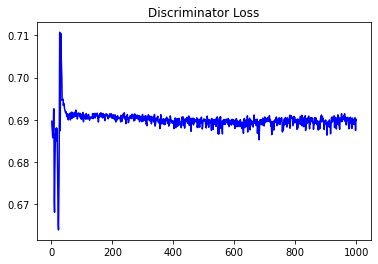

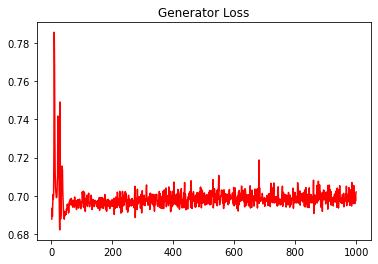

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.5132144025320975


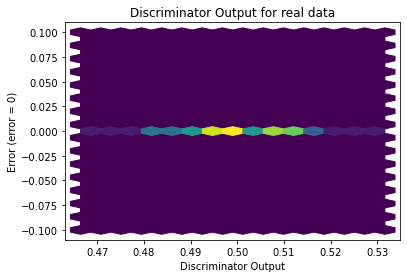

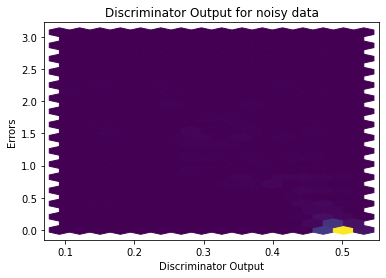

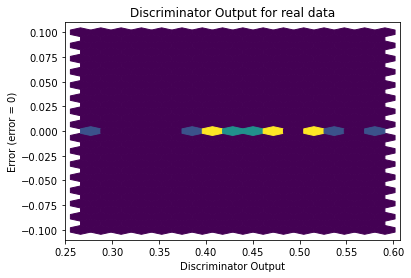

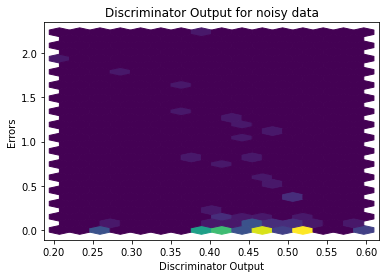

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


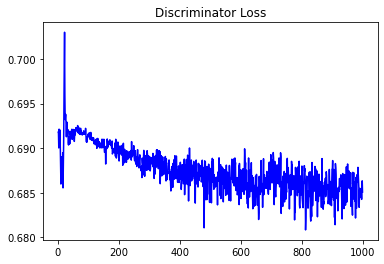

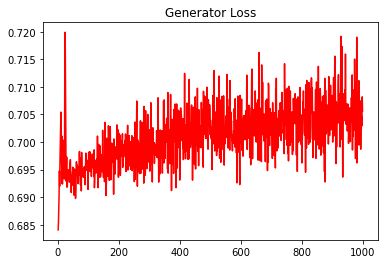

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.48632959520665936


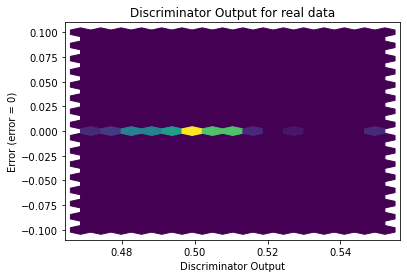

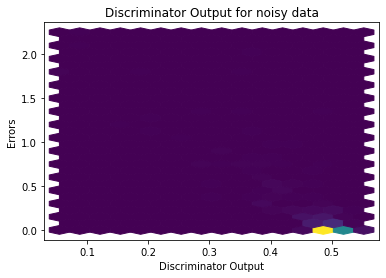

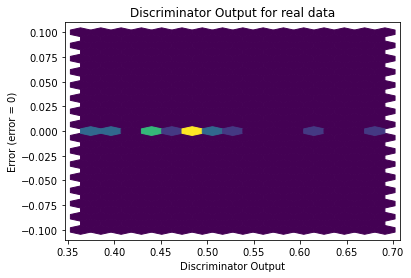

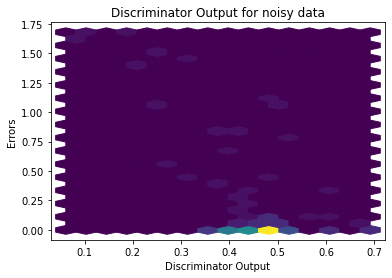

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.7479]], requires_grad=True)
